<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)

# Исследование структуры данных

#### 1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [87]:
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

#### 2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [88]:
hh_df = df.copy()
hh_df.head()

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

#### 3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [89]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

#### 4. Обратите внимание на информацию о числе непустых значений.

#### 5. Выведите основную статистическую информацию о столбцах.

In [90]:
display(hh_df.describe(include='object'))

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 2014 Тюменский Государствен...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

#### 1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух словах и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [91]:
# Создаём словарь, ключами которого являются первые слова признака "Образование и ВУЗ", а значения соответствуют 4-м категориям
level_education_dict = {
    'Высшее образование': 'высшее', 
    'Неоконченное высшее': 'неоконченное высшее',
    'Среднее специальное': 'cреднее специальное', 
    'Среднее образование': 'среднее'
}
# получаем первые два слова и используем их в качестве ключей для получения значений словаря level_education_dict
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(lambda x: level_education_dict.get(' '.join(x.split()[:2])))

print('Список уникальных значений в столбце "Образование": ', hh_df['Образование'].unique(), '\n')

education_mask = hh_df[hh_df['Образование'] == 'среднее'].shape[0]
print('Сколько соискателей имеет средний уровень образования (школьное образование)? ', education_mask)

# удаляем признак "Образование и ВУЗ"
hh_df = hh_df.drop(['Образование и ВУЗ'], axis=1)

Список уникальных значений в столбце "Образование":  ['неоконченное высшее' 'высшее' 'cреднее специальное' 'среднее'] 

Сколько соискателей имеет средний уровень образования (школьное образование)?  559


#### 2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [92]:
# получаем новый признак "Пол"
hh_df['Пол'] = hh_df['Пол, возраст'].apply(lambda x:  'М' if 'Мужчина' in x else 'Ж')
# получаем новый признак "Возраст"
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(lambda x: x.replace(',', ' ').split()[1])
# преобразуем тип признака "Возраст"
hh_df['Возраст'] = hh_df['Возраст'].astype(np.int32)

print('Список уникальных значений в столбце "Пол": ',hh_df['Пол'].unique(), '\n')

print('Тип данных в столбце "Возраст": ', hh_df['Возраст'].dtypes, '\n')

female_percent = round(hh_df[hh_df['Пол']=='Ж'].shape[0] / hh_df['Пол'].shape[0]*100, 2)
print('Сколько процентов женских резюме представлено в наших данных? ', female_percent, '%\n')

print('Чему равен средний возраст соискателей? ', round(hh_df['Возраст'].mean(),1), ' года')

# удаляем признак "Пол, возраст"
hh_df = hh_df.drop(['Пол, возраст'], axis=1)

Список уникальных значений в столбце "Пол":  ['М' 'Ж'] 

Тип данных в столбце "Возраст":  int32 

Сколько процентов женских резюме представлено в наших данных?  19.07 %

Чему равен средний возраст соискателей?  32.2  года


#### 3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [93]:
def get_experience(experience):
    """ Функция выделяет из признака значение опыта.
    Входящая строка разбивается по пробелу и в полученном списке производится поиск
    вхождения слов в списках 'month_key_words' и 'year_key_words'.
    Полученное количество лет преобразуется в количество месяцев, суммируется с полученным количеством месяцев
    и возвращается значение опыта в месяцах.
        Если в признаке есть пропуски, функция возвращает np.nan
    
    Args:
        experience (str): строка признака

    Returns:
        int: опыт работы в месяцах
        np.nan: если есть пропуски в признаке
    """
    
    month_key_words = ['месяц', 'месяцев', 'месяца']
    year_key_words = ['год', 'лет', 'года']
    if (experience == 'Не указано') or (experience is np.nan):
        return np.nan
    experience_splited = experience.split()[2:6]
    month_count = 0
    year_count = 0
    for i, word in enumerate(experience_splited):
        if word in month_key_words:
            month_count = experience_splited[i-1]
        if word in year_key_words:
            year_count = experience_splited[i-1]
    return int(year_count)*12 + int(month_count)


# создаём новый признак "Опыт работы (месяц)" 
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_experience)

print('Чему равен медианный опыт работы (в месяцах)? ', hh_df['Опыт работы (месяц)'].median())

# удаляем признак "Опыт работы"
hh_df = hh_df.drop(['Опыт работы'], axis=1)

Чему равен медианный опыт работы (в месяцах)?  100.0


#### 4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [94]:
def get_city_of_residence(city):
        """Функция выделяет из признака город проживания.
        Входящая строка разбивается по пробелу и в полученном списке производится поиск
        вхождения слов в списки 'megapolis' и 'million_cities'.
        В зависимости от вхождения возвращается 1 из 3 категории: "Москва", "Санкт-Петербург", "город-миллионник".
        Если в этих списках вхождения нет, функция возвращает "другие".
        
        Args:
            city (str): строка признака "Город, переезд, командировки"

        Returns:
            str: 1 из 4 категорий: "Москва", "Санкт-Петербург", "город-миллионник", "другие".
        """
        
        megapolis = ['Москва', 'Санкт-Петербург']
        million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск'
                          , 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа'
                          , 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
        
        city = (city.split()[:1])[0].strip()
        
        if city in megapolis:
            return city
        if city in million_cities:
            return 'город-миллионник'

        return 'другие'
    
    
def get_readiness_move(arg):
    """Функция-"мигалка" вделяет из признака готовность к переезду.
    Входящая строка проверяется на наличие в ней слов 'не готов к переезду' и 'не готова к переезду'.
    Соответственно при наличии функция возвращает False, иначе True.
    
    Args:
        arg (str): признак обрабатываемого объекта

    Returns:
        bool: готовность к переезду
    """
        
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    else:
        return True
    

def get_readiness_secondment(arg):
    """Функция-"мигалка" выделяет из признака готовность к командировкам.
    Сперва проводится проверка есть ли во входящей строке подстрока 'командиров'.
    Если такой подстроки нет, функция возвращает False.
    Входящая строка проверяется на наличие в ней слов 'не готов к командировкам' и 'не готова к командировкам'.
    Соответственно при наличии функция возвращает False, иначе True.

    Args:
        arg (str): признак обрабатываемого объекта

    Returns:
        bool: готовность к командировкам
    """
    
    if ('командиров') not in arg:
        return False

    if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
        return False
    else:
        return True


# создаём новый признак "Город"
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city_of_residence)
# создаём новый признак "Готовность к переезду"
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_readiness_move)
# создаём новый признак "Готовность к командировкам"
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_readiness_secondment)

#Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
applicants_percent = round(hh_df[hh_df['Город']=='Санкт-Петербург'].shape[0] / hh_df['Город'].shape[0]*100)
print('Сколько процентов соискателей живут в Санкт-Петербурге? ', applicants_percent, '%\n')

#Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
mask = (hh_df['Готовность к переезду']) & (hh_df['Готовность к командировкам'])
applicants_percent = round(hh_df[mask].shape[0]/hh_df.shape[0]*100)
print('Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? ', applicants_percent, '%')

# удаляем признак "Город, переезд, командировки"
hh_df = hh_df.drop(['Город, переезд, командировки'], axis=1)

Сколько процентов соискателей живут в Санкт-Петербурге?  11 %

Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам?  32 %


#### 5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [95]:
# списки новых признаков выделяемых из признаков "Занятость" и "График"
busyness_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_list = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

# создаем новые признаки на основе списка busyness_list
for word in busyness_list:
    hh_df[word] = hh_df['Занятость'].apply(lambda x: word in x.split(', '), word)
        
# создаем новые признаки на основе списка schedule_list     
for word in schedule_list:
    hh_df[word] = hh_df['График'].apply(lambda x: word in x.split(', '), word)
    
# Сколько людей ищут проектную работу или волонтёрство?
mask = (hh_df['проектная работа']) & (hh_df['волонтерство'])
print('Сколько людей ищут проектную работу или волонтёрство?', hh_df[mask].shape[0], '\n')

# Сколько людей хотят работать вахтовым методом и с гибким графиком?
mask = (hh_df['вахтовый метод']) & (hh_df['гибкий график'])
print('Сколько людей хотят работать вахтовым методом и с гибким графиком?', hh_df[mask].shape[0], '\n')

# Сколько людей хотят работать вахтовым методом или с гибким графиком?
mask = (hh_df['вахтовый метод']) | (hh_df['гибкий график'])
print('Сколько людей хотят работать вахтовым методом или с гибким графиком?', hh_df[mask].shape[0])
    
# удаляем признаки "Занятость" и "График"
hh_df = hh_df.drop(['Занятость', 'График'], axis=1)

Сколько людей ищут проектную работу или волонтёрство? 436 

Сколько людей хотят работать вахтовым методом и с гибким графиком? 2311 

Сколько людей хотят работать вахтовым методом или с гибким графиком? 16357


#### 6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [96]:
# читаем DataFrame с курсами валют
ex_df = pd.read_csv('data\ExchangeRates.csv', sep=',')
# признак "date" преобразовываем в формат datetime и извлекаем дату
ex_df['date'] = pd.to_datetime(ex_df['date'], dayfirst=True).dt.date
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'], dayfirst=True).dt.date
# словарь валют    
currency_dict = {
    'USD': 'USD', 'KZT': 'KZT', 'руб': 'RUB',
    'грн': 'UAH', 'белруб': 'BYN',
    'EUR': 'EUR', 'KGS': 'KGS',
    'сум': 'UZS', 'AZN': 'AZN'
}
# создаём новый признак "currency" в стандарте ISO
hh_df['currency'] = hh_df['ЗП'].apply(lambda x: currency_dict[x.split()[1].replace('.', '')])
# создаём новый DataFrame объединяя DataFrame с резюме и DataFrame с курсами валют
merged_df = hh_df.merge(
    ex_df,
    how='left',
    left_on=['currency', 'Обновление резюме'],
    right_on = ['currency', 'date']
)
# заполняем пропуски значением "1"
merged_df['close'] = merged_df['close'].fillna(1)
merged_df['proportion'] = merged_df['proportion'].fillna(1)
# создаём новый признак "ЗП сумма" извлекая данные из признака "ЗП"
merged_df['ЗП сумма'] = merged_df['ЗП'].apply(lambda x: float(x.split()[0]))
# создаём новый признак "ЗП (руб)"
hh_df['ЗП (руб)'] = merged_df['ЗП сумма'] * merged_df['close'] / merged_df['proportion']
# удаляем признаки "ЗП" и "currency"
hh_df = hh_df.drop(['ЗП','currency'], axis=1)
# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
# Ответ приведите в тысячах рублей и округлите до целого.
#Например, если у вас получилась медианная з/п 42 127, в качестве ответа укажите 42.
print('Чему равна желаемая медианная заработная плата соискателей(в тысячах)?', round(hh_df['ЗП (руб)'].median()/1000),'тысяч')

Чему равна желаемая медианная заработная плата соискателей(в тысячах)? 59 тысяч


# Исследование зависимостей в данных

### 1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [97]:
x_mode = hh_df['Возраст'].mode()[0]
x_mean = hh_df['Возраст'].mean()
x_median = hh_df['Возраст'].median()

fig = px.histogram(
    hh_df,
    x='Возраст',
    marginal="box",
    width=1000,
    height=400
)

fig.update_layout(
    title=dict(text='Распределение возрастов соискателей',
           x=0.5, xanchor='center', yanchor='top'),
    xaxis_title='Возраст соискателей',
    yaxis_title_text='Количесво соискателей',
    legend_title=None,
    font=dict(size=14)
)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()
fig.write_html("plotly/hist_age_distribution.html")

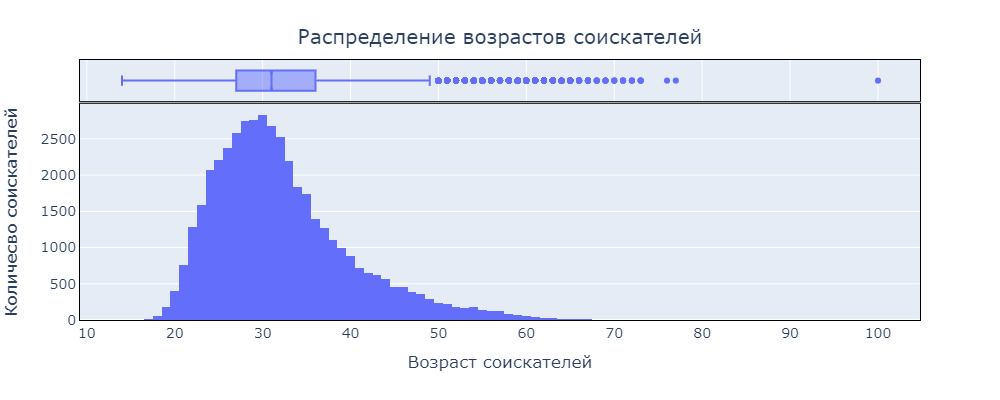

##### График имеет положительное распределение. Мода распределения возраста соискателей - 30 лет. Предельные значения возраста 14 и 100 лет соответственно. Возраст большинства соискателей лежит в интервале от 27 до 36 лет. У данного признака присутствуют аномалии в правой части. И если значения до 70 лет, теоретически можно представить как людей которые вышли на пенсию, и ищут работу, то значения от 70 и выше, с большей долей вероятности, можно отнести к аномальным.

### 2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [98]:
x_mode = hh_df['Опыт работы (месяц)'].mode()[0]
x_mode_str = 'Мода = ' + str(int(x_mode)) + 'месяц'

fig = px.histogram(
    hh_df,
    x='Опыт работы (месяц)',
    marginal="box",
    #color_discrete_sequence=['indianred'],
    width=1000,
    height=400
)

fig.update_layout(
    title=dict(text='Распределение опыта работы соискателей',
           x=0.5, xanchor='center', yanchor='top'),
    xaxis_title='Опыт работы соискателей (в месяцах)',
    yaxis_title_text='Количесво соискателей',
    legend_title=None,
    font=dict(size=14)
)

fig.add_annotation(
    x=x_mode,
    y=1400,
    #xref="paper",
    #yref="paper",
    text=x_mode_str,
    showarrow=True,
    ax=100,
    #ay=0,
    arrowhead=5
)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()
fig.write_html("plotly/hist_work_experience.html")

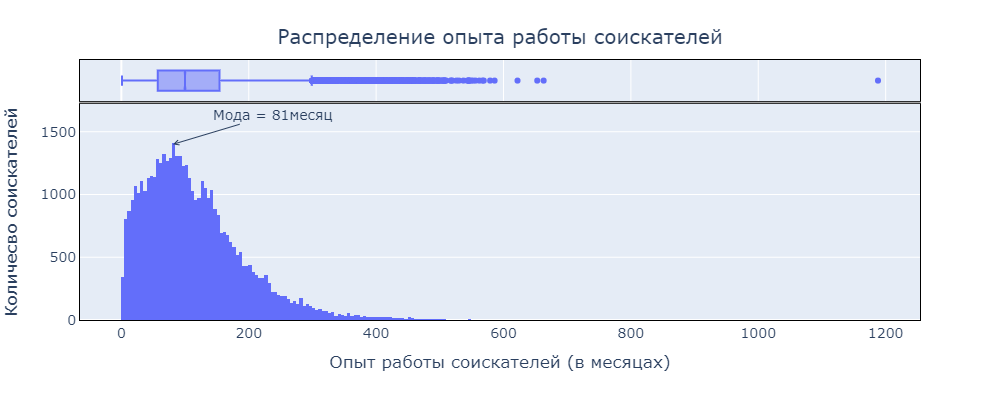

##### График имеет положительное распределение. Мода распределения опыта соискателей - 81 месяц (около 7лет). Предельные значения опыта 1 и 1188  месяцев соответственно. Опыт большинства соискателей лежит в интервале, от 57 до 154 мес. (приблизительно 5-13 лет). У данного признака присутствуют аномалии в правой части. И если значения около 600 мес. (приблизительно 50 лет), соотносится с людьми пенсионного возраста которые ищут работу (как мы предположили в предыдущем пункте), то значение 1188 мес., является аномалией.

### 3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [99]:
x_mode = hh_df['ЗП (руб)'].mode()[0]
x_mode_str = 'Мода = ' + str(int(x_mode)) + 'руб.'

fig = px.histogram(
    hh_df,
    x='ЗП (руб)',
    marginal="box",
    width=1000,
    height=400
)
fig.update_layout(
    title=dict(text='Распределение желаемой заработной платы',
           x=0.5, xanchor='center', yanchor='top'),
    xaxis_title='Желаемая заработная плата (в рублях)',
    yaxis_title_text='Количесво соискателей',
    legend_title=None,
    font=dict(size=14)
)
fig.add_vline(
    x=1e6,
    line_dash="dot",
    col=1,
    #annotation_text="1 млн. руб.",
    line_color="salmon",
    line_width=1
)
fig.add_annotation(
    x=1e6,
    y=2400,
    text='1 млн. руб.',
    showarrow=True,
    ax=100,
    arrowhead=5
)
fig.add_annotation(
    x=x_mode,
    y=4300,
    text=x_mode_str,
    showarrow=True,
    ax=110,
    ay=0,
    arrowhead=5
)

fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()
fig.write_html("plotly/hist_salary_distribution.html")

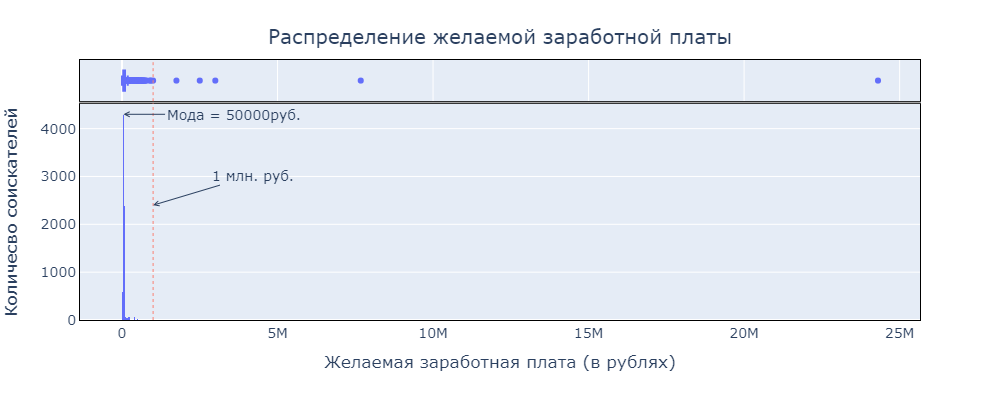

##### График имеет положительное распределение. Мода распределения желаемой заработной платы - 50000 руб.. Предельные значения заработной платы 1 руб. и 24 млн. руб.  соответственно. Желаемая, большинством соискателей заработная плата, лежит в интервале, от 37 до 95 тыс. руб.. У данного признака присутствуют аномалии, как в левой, так и в правой частях. Логично предположить, что заработная плата в размере 1 руб. и 24 млн. руб. были введены ошибочно.

### 4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [100]:
education_grouped = hh_df[hh_df['ЗП (руб)']<1e6].groupby('Образование')['ЗП (руб)'].median().sort_values()
fig = px.histogram(
    education_grouped,
    x=education_grouped.index,
    y=education_grouped.values,
    width=1000,
    height=400
)

fig.update_layout(
    title=dict(text='Зависимость медианной желаемой заработной платы от уровня образования',
           x=0.5, xanchor='center', yanchor='top'),
    xaxis_title='Уровень образования',
    yaxis_title_text='Желаемая заработная плата (в рублях)',
    legend_title=None,
    font=dict(size=14)
)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()
fig.write_html("plotly/hist_salary_education.html")

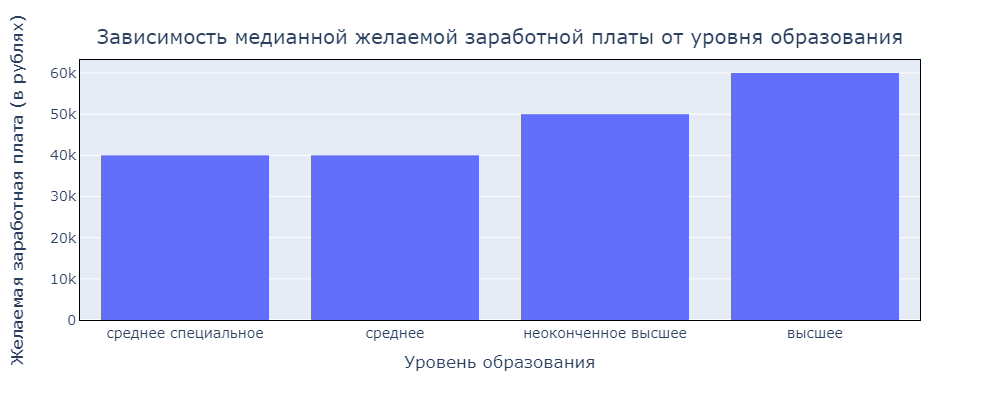

##### Наименьшие уровни желаемой заработной платы  у соискателей со средним и средним специальным образованием (они одинаковы, 40 тыс.руб). Наибольший уровень у соискателей с высшим образованием. На основании графика можно cделать вывод - чем выше уровень образования, тем выше желаемая ЗП. Так же можно сделать вывод, что данный признак важен при прогнозировании заработной платы.

### 5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [101]:
salary_mask = hh_df[hh_df['ЗП (руб)']<1e6]
   
fig = px.box(
    salary_mask, x='ЗП (руб)',
    color='Город',
    notched=True,
    width=1000,
    height=400
)
fig.update_layout(
    title=dict(text='Распределение желаемой заработной платы в зависимости от города',
           x=0.5, xanchor='center', yanchor='top'),
    xaxis_title='Желаемая заработная плата (в рублях)',
    #yaxis_title='Статус лояльности',#'Значение',
    #showlegend=False,
    legend_title=None,
    font=dict(size=14)
)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()
fig.write_html("plotly/box_salary_city.html")

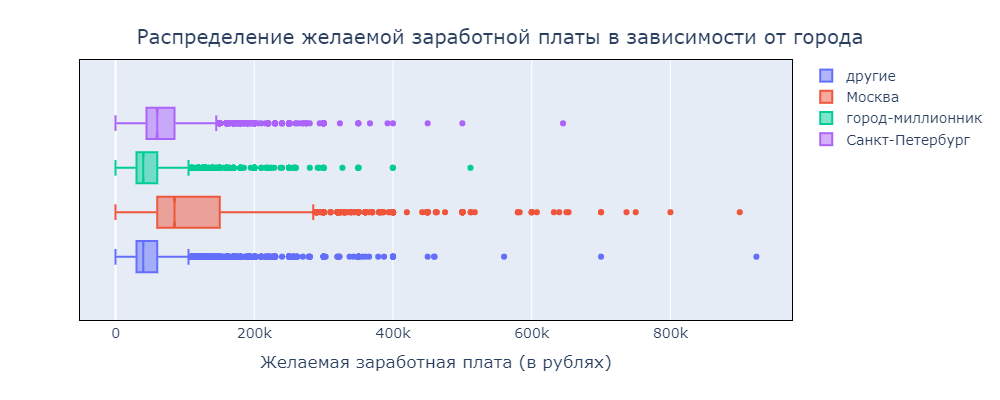

##### Медианный уровень желаемой заработной платы в Москве больше чем в остальных городах. В Санкт-Петербурге почти в полтора раза меньше чем в Москве и в полтора раза больше чем в остальных городах (60 т. р.). В городах миллионниках и других  совпадают (40 т. р.) В регионах желаемые заработные платы совпадают практически по всем цифрам, отличаясь только максимумом. Размах, что логично, в Москве самый большой (90 т. р.) и начинается там, где размах региональных уже заканчивается (60 т. р.). Санкт-Петербург соответственно находится в середине между Москвой и регионами (~40 т. р.). А в регионах самый маленький размах (30 т. р.). Условно можно разделить на три категории, два мегаполиса и регионы. При прогнозировании заработной платы признак города является важным.


### 6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [102]:
grouped_data = hh_df.groupby(by=['Готовность к командировкам', 'Готовность к переезду'], as_index=False)[['ЗП (руб)']].median()

print('Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? ',
     round(grouped_data['ЗП (руб)'].iloc[3]/1000), 'тыс. руб.')

grouped_data.index = ['Командировки - нет. Переезд - нет.', 'Командировки - нет. Переезд - да.',
                  'Командировки - да. Переезд - нет.', 'Командировки - да. Переезд - да.']

fig = px.histogram(
    grouped_data,
    x=grouped_data.index,
    y='ЗП (руб)',
    #nbins=4,
    #color=top_data.index,
    width=1000,
    height=400
)

fig.update_layout(
    title=dict(
        text='Зависимость медианной заработной платы от признаков "Готовность к переезду" и "Готовность к командировкам".',
        x=0.5, xanchor='center', yanchor='top'
    ),
    xaxis_title='Готовность к переезду и командировкам',
    yaxis_title_text='Медиана желаемой заработной платы (в рублях)',
    legend_title=None,
    font=dict(size=11)
)
#fig.update_xaxes(type='category')
fig.update_xaxes(type='category', showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()
fig.write_html("plotly/hist_salary_move_secondment.html")

Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам?  66 тыс. руб.


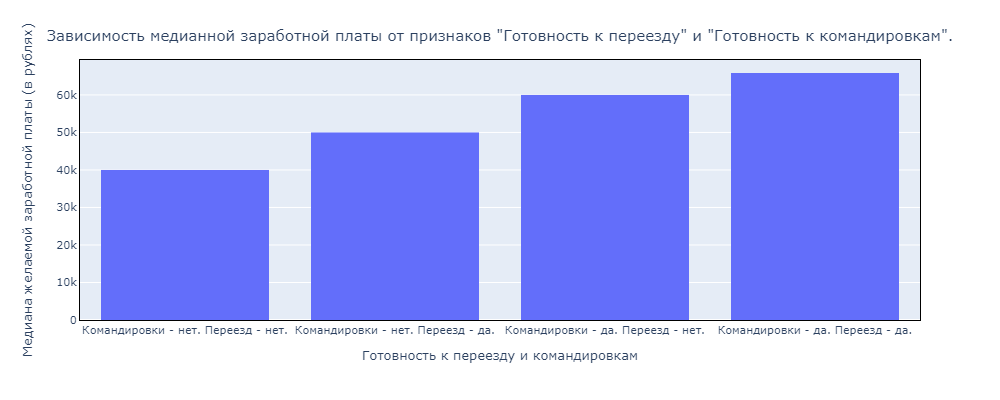

##### Медианный уровень желаемой заработной платы возрастает с готовность соискателя к переезду и командировкам. Логично предположить, что соискатель готовый переехать в крупный город ищет более оплачиваемую работу. А в командировки чаще всего ездит либо из комсостава (например, в региональные представительства) либо специалист (например, налаживать производство в регионах). Данные признаки так же следует учитывать при прогнозировании.

### 7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [103]:
edu_age_pivot = hh_df.pivot_table(values='ЗП (руб)', index='Образование', columns='Возраст', aggfunc='median')
fig = px.imshow(
    edu_age_pivot,
    labels=dict(color='Медиана ЗП(руб)'),
    width=1000,
    height=400
)
fig.update_layout(
    title=dict(
        text='Зависимость медианной заработной платы от возраста и образования.',
        x=0.5, xanchor='center', yanchor='top'
    ),
    xaxis_title='Возраст (в годах)',
    yaxis_title_text='Образование',
    legend_title=None,
    font=dict(size=11)
)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()
fig.write_html("plotly/imshow_salary_age_education.html")

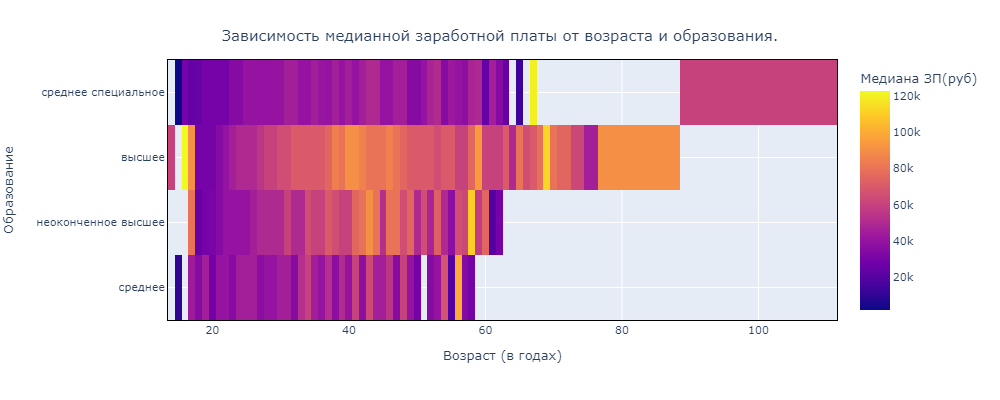

##### Самая высокая интенсивность роста заработной платы наблюдается в категории "высшее". Менее интенсивно зп растет в категории "неоконченное высшее". И очень медленно в категории "среднее специальное". В категории же "среднее" наблюдается "зебра" и трудно сделать однозначный вывод. В категории "высшее" присутствуют аномалии, связанные, скорее всего с ошибками при заполнении (трудно представить соискателя в возрасте 14 или 16 лет с высшим образованием, хотя теоретически такое возможно). Так же в категории "среднее специальное" присутствует аномалия, невероятно, что человек в возрасте 100 лет ищет работу. Данные признаки следует учитывать при прогнозировании.

### 8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [104]:
# создаём временный признак
hh_df['Опыт работы (год)'] = hh_df['Опыт работы (месяц)'].apply(lambda x: (x / 12))
#hh_df['Опыт работы (год)'] = hh_df['Опыт работы (год)'].fillna(1)
#hh_df['Опыт работы (год)'] = hh_df['Опыт работы (год)'].astype(np.int8)

fig = px.scatter(
    hh_df,
    x='Возраст',
    y='Опыт работы (год)',
    width=1000,
    height=400
)

fig.add_shape(
    type="line",
    x0=0,
    y0=0,
    x1=100,
    y1=100,
    line=dict(
        color="black",
        width=1,
    ),
)

fig.update_layout(
    title=dict(
        text='Зависимость опыта работы от возраста.',
        x=0.5, xanchor='center', yanchor='top'
    ),
    xaxis_title='Возраст (в годах)',
    yaxis_title_text='Опыт работы (в годах)',
    legend_title=None,
    font=dict(size=12)
)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

fig.show()
fig.write_html("plotly/scatter_work_experience_age.html")
# удаляем временный признак
hh_df = hh_df.drop(['Опыт работы (год)'], axis=1)

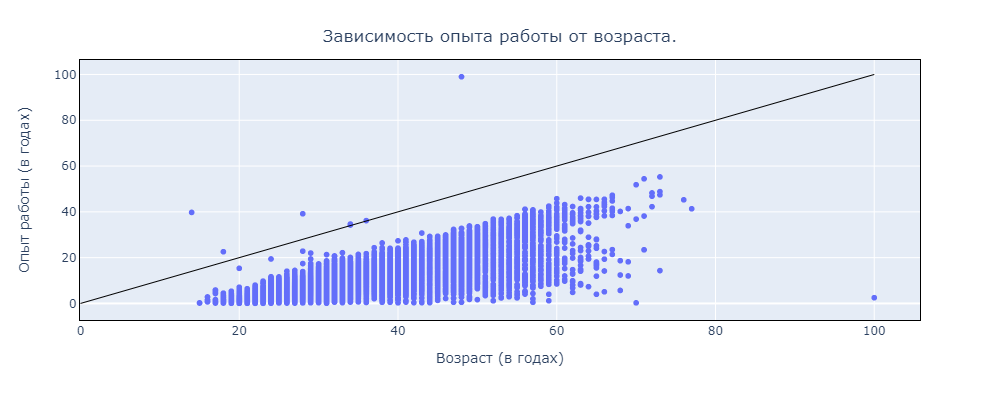

##### В целом можно сделать вывод что с повышением возраста повышается и опыт. Но на графике видно что присутствует много аномалий как явных (опыт превышает возраст), так и не явных (соискатель начал получать опыт с 5 лет). Логично предположить что опыт должен отличаться от возраста лет на 15 в меньшую сторону.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [105]:
salary_mask = hh_df[hh_df['ЗП (руб)']<1e6]
   
fig = px.box(
    salary_mask, x='ЗП (руб)',
    color='Пол',
    notched=True,
    width=1000,
    height=400
)
fig.update_layout(
    title=dict(text='Распределение желаемой заработной платы в зависимости от пола',
           x=0.5, xanchor='center', yanchor='top'),
    xaxis_title='Желаемая заработная плата (в рублях)',
    #yaxis_title='Статус лояльности',#'Значение',
    #showlegend=False,
    legend_title=None,
    font=dict(size=14)
)
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()
fig.write_html("plotly/box_salary_gender.html")

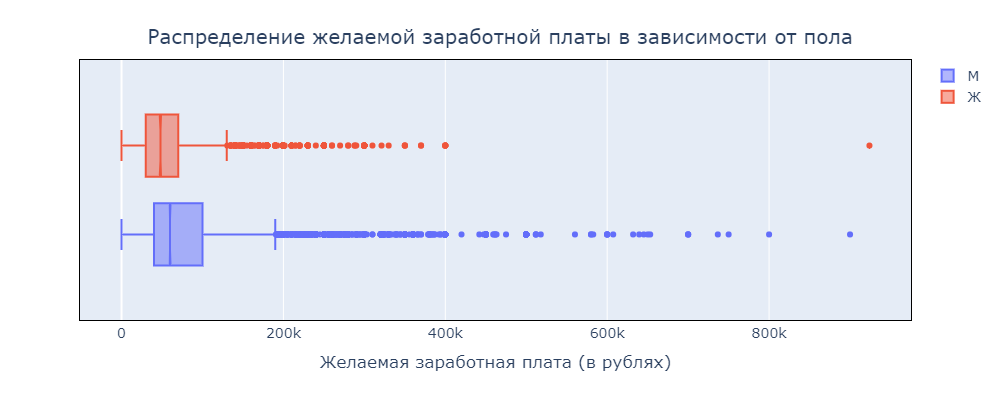

##### Размах (на 50%) и медиана (~на 25%) больше у мужчин больше чем у женщин. Скорее всего, это связано с тем, что на руководящих должностях чаще работают мужчины. Соответственно заработные платы выше, что мы и наблюдаем на графике. При прогнозировании данный признак так же нужно учитывать.

In [106]:
grouped_data = hh_df.groupby(['Пол', 'Образование'], as_index=False)['ЗП (руб)'].median()
grouped_data.columns = ['Пол', 'Образование', 'Медиана']

fig = px.bar(
    grouped_data,
    x='Образование',
    y='Медиана',
    color='Пол',
    barmode="group",
    height=400,
    width=1000
)
fig.update_layout(
    title=dict(
        text='Зависимость медианной заработной платы от пола и образования.',
        x=0.5, xanchor='center', yanchor='top'
    ),
    xaxis_title='Образование',
    yaxis_title_text='Медиана желаемой заработной платы (в рублях)',
    legend_title=None,
    font=dict(size=11)
)
#fig.update_xaxes(type='category') #, categoryorder='category ascending'
fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig.show()
fig.write_html("plotly/bar_salary_gender_education.html")

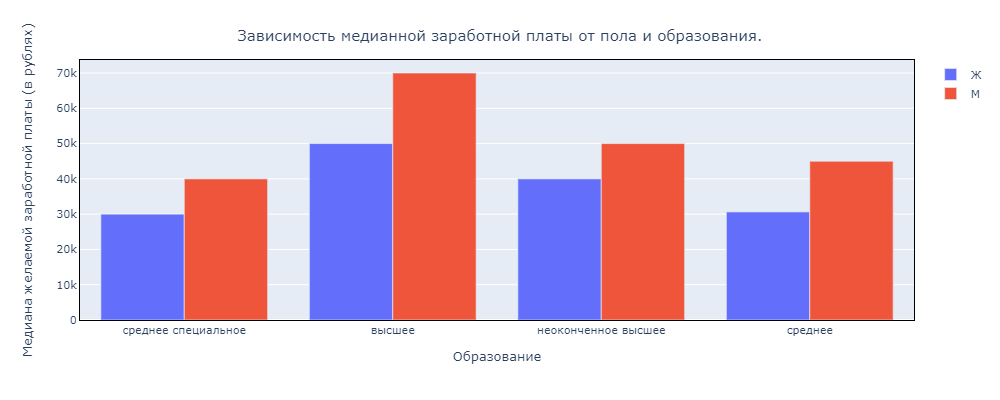

##### Вне зависимости от категории  наблюдается повышенная медиана у мужчин, что дополнительно подтверждает выводы сделанные в предыдущем пункте. Что интересно в двух категориях "высшее" и "среднее", разница самая высокая и практически одинакова (~50%).  И если с категорией "высшее" можно сделать вывод что большее количество руководящих и соответственно высокооплачиваемых должностей занимают мужчины, то с категорией "среднее" сделать однозначные выводы затруднительно. Самая минимальная разница наблюдается в категории "неоконченное высшее" и можно сделать вывод, что оба пола находятся примерно в равных условиях.

# Очистка данных

### 1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [107]:
dupl_columns = list(hh_df.columns)
mask = hh_df.duplicated(subset=dupl_columns)
hh_duplicates = hh_df[mask]
hh_df = hh_df.drop_duplicates(subset=dupl_columns)
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

Число найденных дубликатов: 161


### 2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [108]:
print(hh_df.isnull().sum())

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64


### 3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [109]:
hh_df.dropna(how='any', axis=0, inplace=True, subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
values = {'Опыт работы (месяц)': hh_df['Опыт работы (месяц)'].median()}
hh_df = hh_df.fillna(values)
#Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков?
#Ответ округлите до целых.
result_mean = round(hh_df['Опыт работы (месяц)'].mean())
print('Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)»? ', result_mean, 'месяцев')

Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)»?  114 месяцев


### 4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [110]:
mask = (hh_df['ЗП (руб)']>1e6) | (hh_df['ЗП (руб)']<1e3)
print('Сколько выбросов вы нашли? ', hh_df[mask].shape[0])
hh_df = hh_df.drop(hh_df[mask].index)

Сколько выбросов вы нашли?  89


### 5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [111]:
mask = (hh_df['Опыт работы (месяц)']/12) > (hh_df['Возраст'])
print('Сколько выбросов вы нашли? ', hh_df[mask].shape[0])
hh_df = hh_df.drop(hh_df[mask].index)

Сколько выбросов вы нашли?  7


### 6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

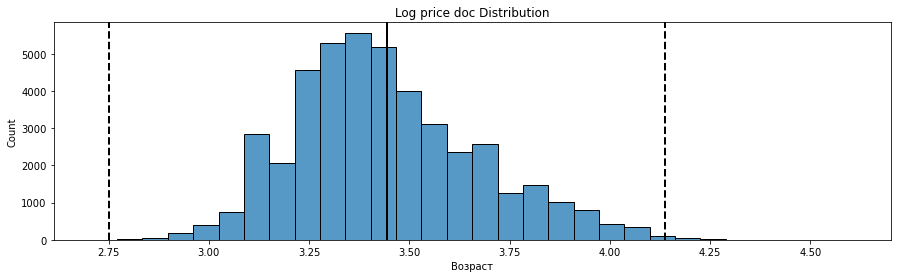

In [112]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False, zero_value=0):
    """Функция реализует т. н. "алгоритм метода z-отклонения:
    - вычисляется математическое ожидание Mu(среднее) и стандартное отклонение Sigma признака X;
    - вычисляется нижняя и верхняя граница интервала как:
        нижняя граница = Mu - 3 * Sigma
        верхняя граница = Mu + 3 * Sigma
    -находятся наблюдения которые выходят за пределы границ.

    Args:
        data (_type_): объект - Series или DataFrame
        feature (_type_): признак объекта - строка преданная в кавычках ("наименование столбца")
        left (int, optional): Количество сигм слева. Defaults to 3.
        right (int, optional): Количество сигм справа. Defaults to 3.
        log_scale (bool, optional): Включение возможности работы в логарифмическом масштабе. Defaults to False.
        zero_value (int, optional): Если признак имеет среди своих значений 0 в фукцию нужно передать 1. 
                                    Из математики известно, что логарифма от 0 не существует, поэтому мы прибавляем к нашему признаку 1,
                                    чтобы не логарифмировать нули и не получать предупреждения. Defaults to 0.

    Returns:
        _type_: Функция возвращает первым значением объект с потенциальными выбросами, вторым очищенный объект (Series или DataFrame)
    """
    if log_scale:
        x = np.log(data[feature]+zero_value)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


fig, ax = plt.subplots(1, 1, figsize=(15, 4))
log_age = np.log(hh_df['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()-3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log price doc Distribution');

In [113]:
print(f'Ассиметрия распределения равна: {log_age.skew()}')
outliers, _ = outliers_z_score_mod(hh_df, 'Возраст', left=3, right=4, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f"C каким возрастом соискатели попадают под категорию выбросов? {outliers['Возраст'].unique()}")

hh_df = hh_df.drop(outliers.index)

Ассиметрия распределения равна: 0.4523422276053838
Число выбросов по методу z-отклонения: 3
C каким возрастом соискатели попадают под категорию выбросов? [ 15 100]


##### Так как асимметрия распределения положительная то можно сказать что распределение имеет правостороннюю асимметрию.